Saving bank-full.csv to bank-full (3).csv
🔍 Shape: (45211, 17)
✅ Accuracy: 0.8876479044564857

📊 Confusion Matrix:
 [[7769  183]
 [ 833  258]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.24      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



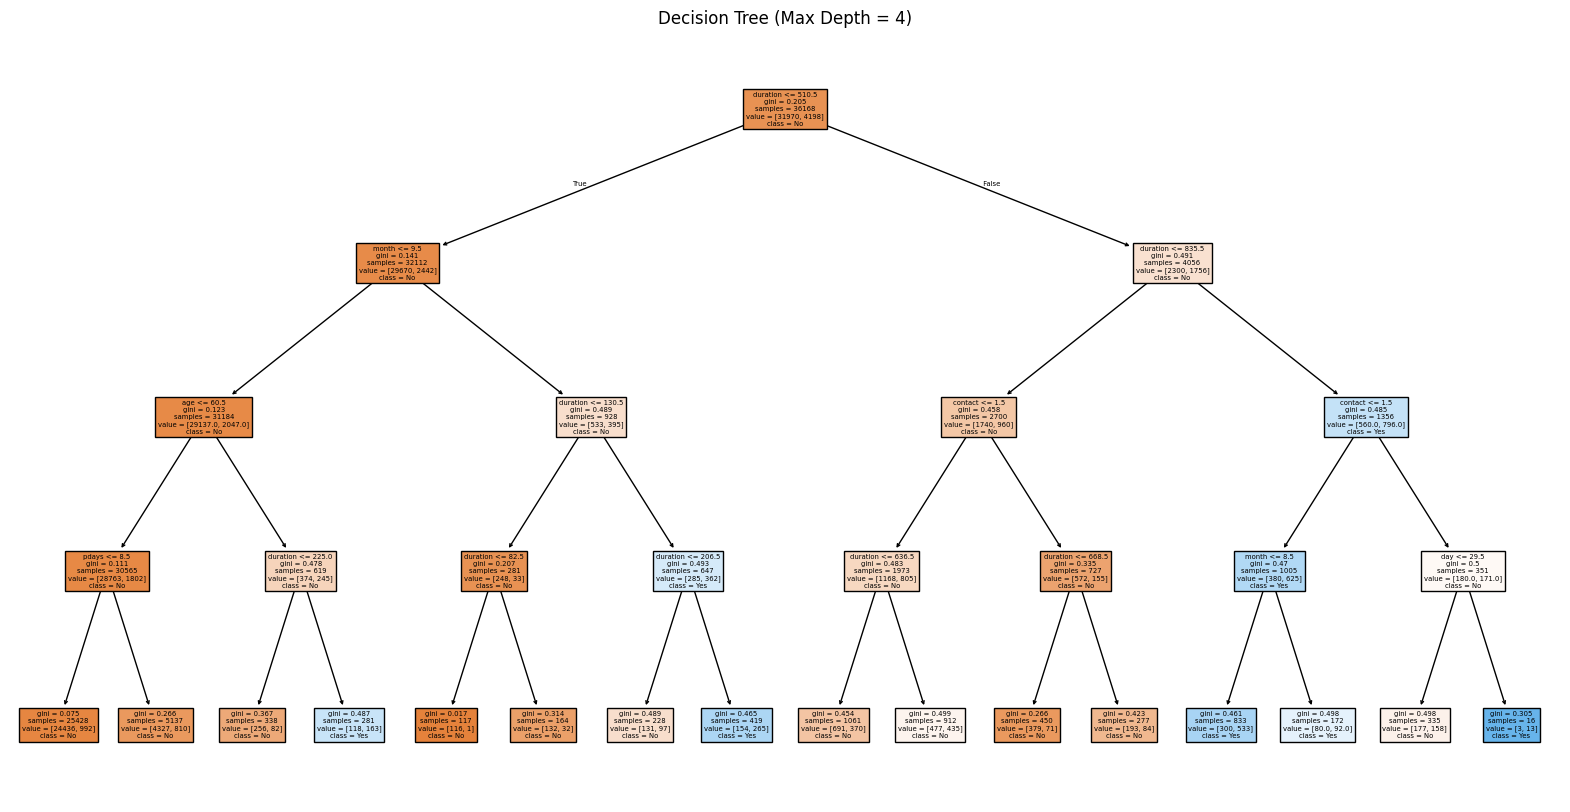

|--- duration <= 510.50
|   |--- month <= 9.50
|   |   |--- age <= 60.50
|   |   |   |--- pdays <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- pdays >  8.50
|   |   |   |   |--- class: 0
|   |   |--- age >  60.50
|   |   |   |--- duration <= 225.00
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  225.00
|   |   |   |   |--- class: 1
|   |--- month >  9.50
|   |   |--- duration <= 130.50
|   |   |   |--- duration <= 82.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  82.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  130.50
|   |   |   |--- duration <= 206.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  206.50
|   |   |   |   |--- class: 1
|--- duration >  510.50
|   |--- duration <= 835.50
|   |   |--- contact <= 1.50
|   |   |   |--- duration <= 636.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  636.50
|   |   |   |   |--- class: 0
|   |   |--- contact >  1.50
|   |   |   |--- duration <= 668.50
|   |   |   |   |---

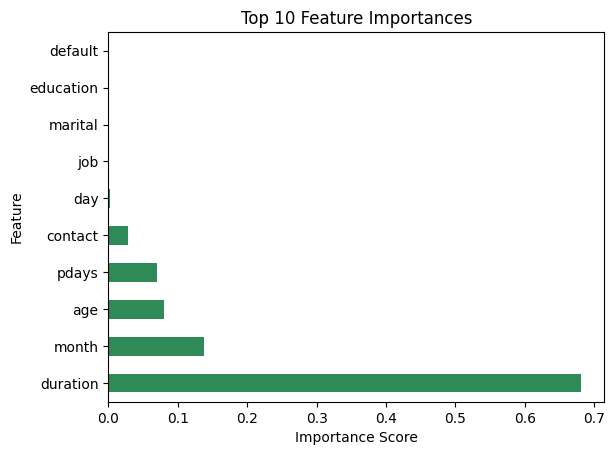

In [ ]:
# ✅ STEP 1: Upload the file manually
from google.colab import files
uploaded = files.upload()

# ✅ STEP 2: Load the dataset
import pandas as pd

df = pd.read_csv('bank-full.csv', sep=';')
print("🔍 Shape:", df.shape)
df.head()

# ✅ STEP 3: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

# ✅ STEP 4: Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 5: Train a simplified Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Set max_depth
model.fit(X_train, y_train)

# ✅ STEP 6: Predict and Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ STEP 7: Visualize the simplified Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree (Max Depth = 4)")
plt.show()

# ✅ STEP 8: Print human-readable decision rules
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

# ✅ STEP 9: Plot Top 10 Most Important Features
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='seagreen')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
